In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab_symfseries2023.ipynb")

# Assignment

***
**Task**:  Use symbolic processing to find and plot the frequency-domain representation of $x_2(t)$ below over the range $k=-8, \ldots, 8$:

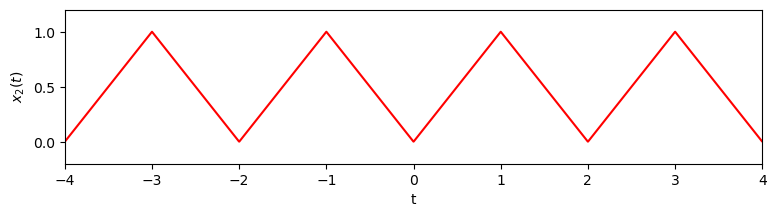

Also plot the reconstruction over the range $t=-4$ to $t=4$ using only components up to and including the $5$th harmonic.
***

First import numerical and plotting libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The function $x_2(t)$ above can be written as a Fourier series
$$x_2(t) = \sum_{k=-\infty}^{\infty} c_k e^{j k \pi t}$$ with coefficients are given by
$$c_k = \frac{1}{2} \int_0^2 x_2(t) e^{-j k \pi t} dt$$.

*By hand*, find an expression for the coefficients $c_k$.  If you do this from first principles you will likely need to use integration by parts, but you might find a simpler "shortcut" using some transformed signal.

In the function below, insert the code required to calculate the coefficient values $c_k$ corresponding to each value of $k$ given in the vector `kv`.  The returned output `ckv` must be the same size as `kv` and should be comprised of 64-bit complex numbers (numpy.complex64).  If any element of `kv` is not an integer then the corresponding element of the output should be `NaN`.  

In [19]:
def getcoeffs(kv):
    """Calculate and return Fourier series coefficients for x2(t)
    kv - input vector of values of k for which series coefficients are required
    ckv - corresponding output vector of series coefficients
    """
    ckv = np.empty(kv.shape, dtype=np.complex64)

    for i in range(len(kv)):
        k = kv[i]
        if k % 1 != 0:
            ckv[i] = np.nan
        else:
            if (k==0):
                ce = 0.5
            else:
                ce = ((np.exp(-1j * k * np.pi) / (k**2 * np.pi**2))- (np.exp(-1j * 2 * k * np.pi) / (2 * k**2 * np.pi**2))- (1 / (2 * k**2 * np.pi**2)))
            ckv[i] = np.complex64(ce)
    return ckv

In [20]:
# Test case
kv = np.array((-1,-0.5,0,1,2,3))
ckv = getcoeffs(kv)

In [21]:
grader.check("symfseries_q2a")

symfseries_q2a results: All test cases passed!
symfseries_q2a - 1 message: Shape of output vector equals shape of input
symfseries_q2a - 2 message: Type of output vector is numpy.dtype('complex64')
symfseries_q2a - 3 message: Output is NaN for invalid input elements

Using your function above the Fourier series coefficients can be plotted over a desired range:

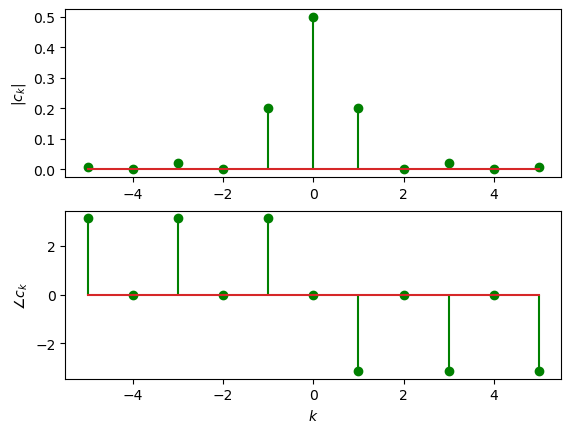

In [22]:
M = 5
kv = np.arange(-M,M+1)
ckv = getcoeffs(kv)
fh, ax = plt.subplots(2);
ax[0].stem(kv, np.abs(ckv), 'g');  ax[0].set_ylabel(r'$|c_k|$');
ax[1].stem(kv, np.angle(ckv), 'g');  ax[1].set_ylabel(r'$\angle c_k$');
plt.xlabel('$k$');

Assuming all the rest zero, the coefficients above define a signal
$$
\hat{x}_2^M(t) = \sum_{-M}^{M} c_k e^{j k \pi t}
$$
For large $M$ large enough this should approximately equal $x_2(t)$.  

For quite small $M$ the formula above should provide a good approximation to $x_2(t)$ since $|c_k|$ tends to zero quite quickly as $k$ increases.  This means that we can effectively represent the signal $x_2(t)$ using a small set of coefficients around $k=0$.

In [23]:
def fsrrec(kv,ckv,omega0,tv):
    """Generate samples from real Fourier series representation
    kv,ckv - Fourier series vector of coefficients (ck) for each integer (k)
    omega0 - fundamental frequency
    tv - input time domain points for calculating reconstruction value  
    returns xv - output values for each input time domain point
    """
    xv = np.zeros(tv.shape);
    for i in range(1,len(kv)):
        xv = xv + ckv[i]*np.exp(1j*kv[i]*omega0*tv);  # accumulate current term

    return(np.real(xv));  # only correct if signal is actually real!
# end def

Using the coefficients calculated by the `getcoeffs()` function defined above we can plot an approximate reconstruction of the signal.  This should look almost like the original signal but with high-frequency components (usually the ones needed for fast signal transitions) absent.  

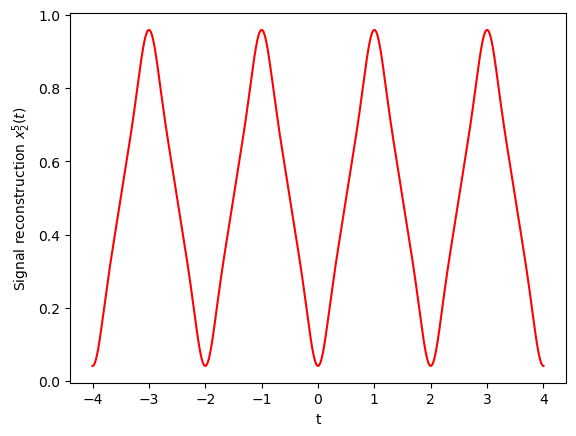

In [24]:
T = 2;
omega0 = 2*np.pi/T;
tv = np.linspace(-4,4,20000)
xv = fsrrec(kv,ckv,omega0,tv)
plt.plot(tv,xv,'r');
plt.xlabel('t');
plt.ylabel('Signal reconstruction $x_2^5(t)$');

---

The function $\hat{x}_2^M(t)$ above approximates $x_2(t)$ as long as $M$ is large (specifically as $M \to \infty$). Technically we should have
$$\lim_{M \to \infty} | \hat{x}_2^M(t) - x_2(t)|^2 = 0,$$
so for large $M$ we have $\hat{x}_2^M(t) \approx x_2(t)$ for all values of $t$.  The quality of this approximate reconstruction depends on $M$ (the number of terms) and gets better as $M$ increases.  

To explore the dependence of this reconstruction on $M$ consider a time instant $t=1$.  The true signal value is $x_2(1)=1$.  In the block below calculate the reconstructed value $x_2^M(1)$ for all values of $M$ in the vector `Mv`, and store the result in the variable `x2Mv`.  You should use the function `fsrrec` above.

In [26]:
Mv = np.arange(0,11)  # values of M
tp = np.array(1);  # single time point to evaluate
x2Mv = np.empty(Mv.size)  # corresponding values of x2(tp) reconstructed from M terms
for i in range(0,len(Mv)):
    M = Mv[i]
    C_mvalues = getcoeffs(np.arange(-M, M+1))
    x2Mv[i] = fsrrec(np.arange(-M, M+1), C_mvalues,omega0,tp)

Below is a plot of calculated $x_2^M(1)$ versus $M$.  As $M$ gets large this should approach $x_2(1)=1$.

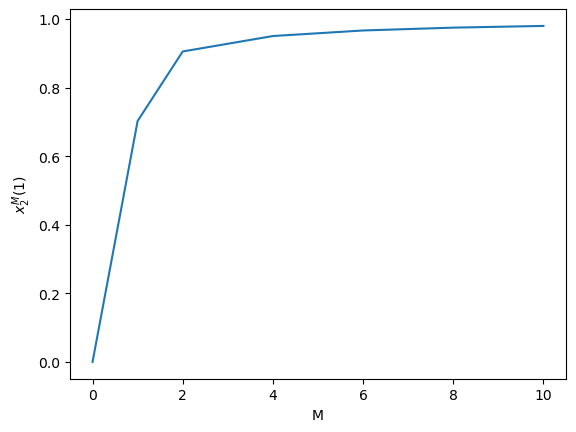

In [27]:
# Generate required plot
plt.plot(Mv,x2Mv)
plt.xlabel('M');  
plt.ylabel('$x_2^M(1)$');

In [28]:
grader.check("symfseries_q2b")

symfseries_q2b results: All test cases passed!
symfseries_q2b - 1 message: Size of x2Mv is equal to size of Mv

---

Instead of calculating the Fourier series coefficients by hand we can do it using symbolic computation.  We first import the `sympy` package and instantiate the "pretty printing' mode for the `display` function.

In [29]:
import sympy as sp
sp.init_printing();  # pretty printing

The given function can be defined piecewise using the symbolic math library function `sp.Piecewise`:

In [30]:
# Define symbolic signal over a single period
Tp = 2;  # period
t = sp.symbols('t')  # declare symbolic time variable
x = sp.Piecewise( (1, t<=-1), (-t, t<0), (t, t<1), (1, True));
#display(x)
#sp.plot(x,(t,-1,1));  # symbolic plot

The coefficients for the Fourier series expansion can be calculated using the expression
$$c_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) e^{-j k \omega_0 t} dt.$$
In the code block below use the `sp.integrate` function to define a symbolic expression for the right-hand side of this equation, and store it in `cke`.  It will depend on the symbolic variables `t`, `T`, `k`, `w0`, and the symbolic function `x(t)`.

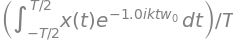

In [37]:
# Define symbolic integral for coefficients
T, k, w0 = sp.symbols('T k w0');
xt = sp.Function("x")(t);  # x(t)
expt = sp.exp(-1j*k*w0*t);
# The line below should define the symbolic integral required for the coefficient values
cke = (1/T)*sp.integrate(xt*expt,(t,-T/2,T/2))
display(cke)

We can substitute required quantities into the symbolic variables as needed.  The result should be a symbolic expression that only depends on the symbolic variable `k`.

In [38]:
# Substitute and evaluate
ck = cke.subs(w0,2*sp.pi/T).doit();
ck = ck.subs(T,Tp).doit();  # set value for period and evaluate
ck = ck.subs(xt,x).doit()
display(ck)

⎧                  -1.0⋅ⅈ⋅π⋅k                       1.0⋅ⅈ⋅π⋅k                 
⎪  (-ⅈ⋅π⋅k - 1.0)⋅ℯ             1.0⋅(-ⅈ⋅π⋅k + 1.0)⋅ℯ             2.0          
⎪- ────────────────────────── + ───────────────────────────── - ─────  for k >
⎨             2  2                           2  2                2  2         
⎪            π ⋅k                           π ⋅k                π ⋅k          
⎪                                                                             
⎩                                 1                                           
──────────────────────────────────────────────────────────────────────────────
                                                2                             

                   
                   
 -∞ ∧ k < ∞ ∧ k ≠ 0
                   
                   
                   
 otherwise         
───────────────────
                   

The final symbolic expression can be used to calculate numerical values of the coefficients by substituting and evaluating.  These values should be the same as the ones calculated by hand before.

In [39]:
# Get coefficients for components up to fifth harmonic
M = 5
kv = np.arange(-M,M+1);  # coefficients to calculate
ckvs = np.zeros(kv.shape, dtype=np.complex64);  # corresponding coefficient values
for i in range(len(kv)):
    ki = kv[i];  
    ckvs[i] = ck.subs({k:ki}).evalf();

The plot of the Fourier series magnitudes and phases again tells you a lot about the signal.  Note that a complex number with a zero magnitude has an arbitrary phase, so the phase correspoinding to a point with zero magnitude means nothing.

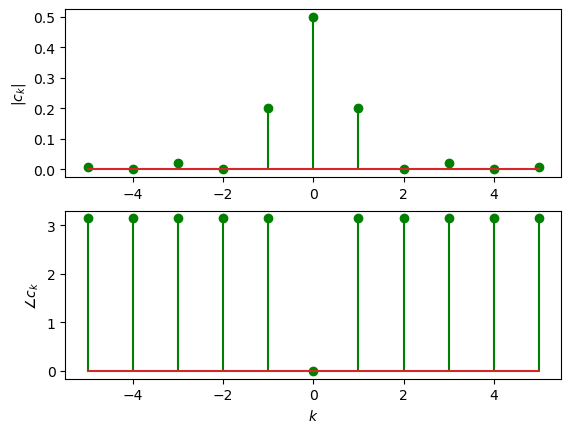

In [40]:
fh, ax = plt.subplots(2);
ax[0].stem(kv, np.abs(ckvs), 'g');  ax[0].set_ylabel(r'$|c_k|$');
ax[1].stem(kv, np.angle(ckvs), 'g');  ax[1].set_ylabel(r'$\angle c_k$');
plt.xlabel('$k$');

In [41]:
grader.check("symfseries_q2c")

symfseries_q2c results: All test cases passed!
symfseries_q2c - 1 message: Variable cke has correct (symbolic) type
symfseries_q2c - 2 message: Variable ck has correct number of free symbolic variables
symfseries_q2c - 3 message: Variables ckv and ckvs are same size
symfseries_q2c - 4 message: Variables ckv and ckvs are equal

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)